# 1. Analysis: Distribution of Star Ratings

## 1.1 Motivation

Before examining textual or behavioral patterns in reviews, we first analyze the distribution of star ratings. Understanding how ratings are distributed provides insight into potential structural biases in the dataset, which is especially important for downstream analyses such as sentiment classification.

In [1]:
#ip install datasets

In [2]:
from datasets import load_dataset
from src.utils import compute_review_length, compute_star_distribution
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'datasets'

In [15]:
ds = load_dataset("ariazhan/yelp_review_uid")
df = ds["train"].to_pandas()

## 1.2 Analysis

We compute both the count and proportion of reviews at each star rating level (1–5). The results show a strong concentration of reviews at higher ratings, particularly 4 and 5 stars.

In [22]:
star_counts = compute_star_distribution(df)
star_counts

stars
1     214
2    1041
3    4267
4    8087
5    3727
Name: count, dtype: int64

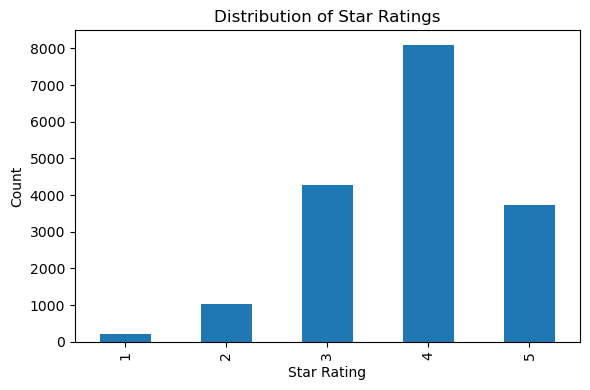

In [5]:
plt.figure(figsize=(6,4))
star_counts.plot(kind="bar")
plt.title("Distribution of Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig("outputs/star_rating_distribution.png", dpi=200)
plt.show()

In [6]:
star_props = df["stars"].value_counts(normalize=True).sort_index()

(star_props * 100).round(2)

stars
1     1.23
2     6.00
3    24.61
4    46.65
5    21.50
Name: proportion, dtype: float64

## 1.3 Findings

- 4-star reviews account for approximately 46.7% of all reviews.

- 5-star reviews account for approximately 21.5% of all reviews.

- Low ratings (1–2 stars) together comprise less than 8% of the dataset.

## 1.4 Interpretation

The star rating distribution is heavily skewed toward higher ratings, with a substantial concentration of reviews receiving 4 or 5 stars. This pattern confirms the presence of a strong positive bias that is commonly observed on online review platforms, where users are more likely to share feedback following particularly satisfactory experiences. As a result, negative or neutral experiences tend to be underrepresented in the data.

This imbalance has important implications for analysis and interpretation. In particular, naive models or summary statistics that do not account for the skewed distribution may overemphasize positive experiences and provide a distorted view of overall customer sentiment. For example, high average ratings may reflect participation bias rather than uniformly positive experiences across all users. Consequently, this distributional skew motivates caution when interpreting aggregate results and highlights the importance of considering class imbalance when conducting sentiment analysis or predictive modeling.

# 2. Relationship Between Review Length and Star Rating

## 2.1 Motivation

Review length may reflect the level of user engagement or emotional intensity. In this section, we examine whether review verbosity—measured by the number of words—is systematically related to star ratings.

In [25]:
df["n_words"] = df["review"].apply(compute_review_length)
df["n_chars"] = df["review"].astype(str).str.len()

## 2.2 Analysis

We compute the number of words in each review and compare review length distributions across star rating categories using summary statistics and boxplots. To quantify the relationship, we also compute the Spearman rank correlation between star ratings and review length.

In [26]:
df.groupby("stars")["n_words"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,214.0,180.47,129.74,1.0,81.0,152.0,257.25,738.0
2,1041.0,168.24,114.19,3.0,87.0,140.0,223.00,959.0
3,4267.0,170.40,112.12,4.0,91.0,144.0,221.00,938.0
4,8087.0,179.05,119.68,1.0,93.0,150.0,235.00,938.0
5,3727.0,207.82,133.25,4.0,112.0,176.0,278.50,928.0


<Figure size 700x400 with 0 Axes>

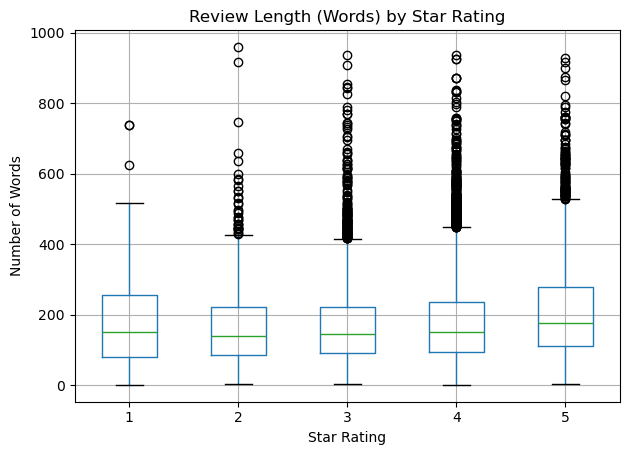

In [27]:

plt.figure(figsize=(7,4))
df.boxplot(column="n_words", by="stars")
plt.title("Review Length (Words) by Star Rating")
plt.suptitle("")  # remove automatic title
plt.xlabel("Star Rating")
plt.ylabel("Number of Words")
plt.tight_layout()
plt.savefig("outputs/review_length_by_star_rating.png", dpi=200)
plt.show()

In [28]:
from scipy.stats import spearmanr

corr, pval = spearmanr(df["stars"], df["n_words"])
corr, pval

(0.1007233235732672, 2.4838356053449514e-40)

## 2.3 Findings

- Higher-rated reviews tend to be slightly longer on average.

- However, review length distributions show substantial overlap across all star rating categories.

- The Spearman correlation between star rating and review length is:

    - ρ ≈ 0.10

    - p-value < 0.001

## 2.4 Interpretation

Although the correlation between review length and star rating is statistically significant, this significance is primarily driven by the large sample size rather than a strong underlying relationship. The observed effect size is small, indicating that increases in review length are associated with only marginal changes in star ratings. As a result, review length alone provides limited explanatory power for predicting user ratings.

The substantial overlap in review length distributions across different star rating categories further supports this conclusion. Reviews with both high and low ratings exhibit wide variation in length, suggesting that verbosity is not a reliable indicator of sentiment intensity or evaluation outcome.

Instead, these findings imply that sentiment in Yelp reviews is more strongly driven by the presence and nature of explicit evaluative language, such as positive or negative adjectives, comparative expressions, and affective cues. Users appear to communicate satisfaction or dissatisfaction primarily through linguistic content rather than through the quantity of text. Consequently, models that rely solely on review length are unlikely to perform well in distinguishing sentiment, whereas approaches that incorporate lexical or semantic features are better suited for capturing sentiment-related signals.